In [8]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''
%config IPCompleter.greedy = True
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import TensorBoard

In [7]:
# num_classes = 10
# batch_size = [8, 32, 64, 128]
# epochs = [3, 6, 9, 12]
# optimizer = ['adam', 'rmsprop', 'adagrad','adadelta']
# activation =['relu','sigmoid']

#number of classes to predict, 2 or 7
num_classes = 2
batch_size = 32
epochs = 3

# input image dimensions
img_rows, img_cols = 28, 28

#set seed for reproducibility / used inside Keras function we can't see
seed = 16
np.random.seed(seed)

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()



In [9]:
#Only look at 2's and 7's
train_picks = np.logical_or(y_train==2,y_train==7)
test_picks = np.logical_or(y_test==2,y_test==7)

x_train = x_train[train_picks]
x_test = x_test[test_picks]
y_train = np.array(y_train[train_picks]==7,dtype=int)
y_test = np.array(y_test[test_picks]==7,dtype=int)


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



In [ ]:
# optimizer = ['adam', 'rmsprop', 'adagrad','adadelta']
# activation =['relu','sigmoid']
# convolutional_layer_shape = [ "active", "num filters", "batch normalization","activation","dropout","max pooling"]
# dense_layer_shape = [ "active", "num nodes","batch normalization","activation","dropout",]

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (12223, 28, 28, 1)
12223 train samples
2060 test samples


In [ ]:
# max_conv_layers = 6
# max_dense_layers = 2 # including final softmax layer
# max_conv_kernals = 256
# max_dense_nodes = 1024
# input_shape = x_train.shape[1:]

In [12]:
RUN_NAME = "callbacksListNormal2class_mnistKeras"

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Create a TensorBoard logger
# loggerTensorBoard = keras.callbacks.TensorBoard(
#     log_dir='logs/{}'.format(RUN_NAME),
#     write_graph=True,
#     histogram_freq=1
# )

loggerTensorBoard = keras.callbacks.TensorBoard(
    log_dir='logs/{}'.format(RUN_NAME),
    histogram_freq=1,
    batch_size=32,
    write_graph=True,
    write_grads=True,
    write_images=False)

loggerEearlyStop = keras.callbacks.EarlyStopping(
    monitor='val_loss',     
    patience=1, 
    verbose=1)
                                            
callbacks_list = [loggerEearlyStop, loggerTensorBoard]

In [15]:
from keras.callbacks import CSVLogger
keras.callbacks.CSVLogger("noramal2classCallbacks", separator=',', append=False)

In [17]:
%%time
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=callbacks_list,
          validation_data=(x_test, y_test))


Train on 12223 samples, validate on 2060 samples
Epoch 1/3
12223/12223 [==============================] - 80s 7ms/step - loss: 0.0504 - acc: 0.9818 - val_loss: 0.0379 - val_acc: 0.9874
Epoch 2/3
12223/12223 [==============================] - 83s 7ms/step - loss: 0.0228 - acc: 0.9930 - val_loss: 0.0333 - val_acc: 0.9893
Epoch 3/3
12223/12223 [==============================] - 85s 7ms/step - loss: 0.0155 - acc: 0.9951 - val_loss: 0.0422 - val_acc: 0.9888
Epoch 00003: early stopping
CPU times: user 9min 46s, sys: 2min 19s, total: 12min 6s
Wall time: 5min 11s


In [17]:
model.save('model/callbacksListnormal2class_mnist_keras.h5')

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02819198369905333
Test accuracy: 0.9917475728155339


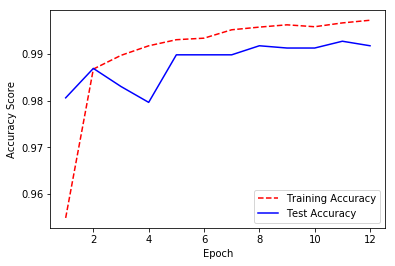

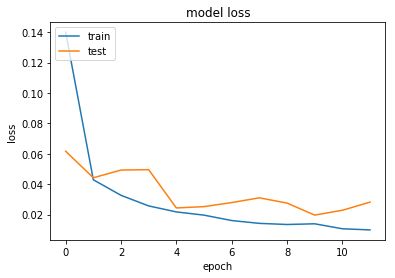

In [19]:
# Get training and test accuracy histories
training_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show();


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


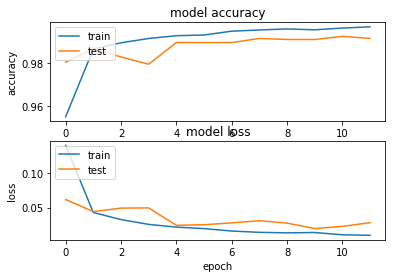

In [20]:
print(history.history.keys())  
   
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show() 

In [27]:
from Two_Classes import SmallMNIST as sm

In [30]:
x_train, x_test, y_train, y_test = sm.returnDataSet(2, 1, 2, 28)

x_train shape: (12700, 28, 28, 1)
12700 train samples
2167 test samples
